# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.661  1  1.200 0.275 0.006   
                             age        0.021  1  0.039 0.844 0.000   
                             Kiel       1.686  1  3.060 0.082 0.016   
                             Magdeburg  4.440  1  8.060 0.005 0.040   
                             Sweden     7.861  1 14.272 0.000 0.070   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.203  1  0.216 0.643 0.001   
                             age        1.222  1  1.301 0.255 0.007   
                             Kiel       0.044  1  0.047 0.828 0.000   
                             Magdeburg  1.891  1  2.014 0.158 0.010   
                             Sweden    17.241  1 18.360 0.000 0.088   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.561  0.436    False  
                             age               0.074  0.908    False  
                             Kiel              1.087  0.179    False  
                             Magdeburg         2.300  0.019     True  
                             Sweden            3.675  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.192  0.766    False  
                             age               0.593  0.414    False  
                             Kiel              0.082  0.897    False  
                             Magdeburg         0.803  0.292    False  
                             Sweden            4.538  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.076  1  7.860 0.006 0.040   
                             age        0.011  1  0.079 0.780 0.000   
                             Kiel       0.274  1  2.000 0.159 0.010   
                             Magdeburg  0.421  1  3.074 0.081 0.016   
                             Sweden     1.606  1 11.729 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.809  1  3.649 0.058 0.019   
                             age        0.578  1  1.165 0.282 0.006   
                             Kiel       2.468  1  4.977 0.027 0.025   
                             Magdeburg  1.982  1  3.997 0.047 0.020   
                             Sweden    15.816  1 31.897 0.000 0.143   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.254  0.016     True  
                             age               0.108  0.850    False  
                             Kiel              0.799  0.260    False  
                             Magdeburg         1.091  0.152    False  
                             Sweden            3.123  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.240  0.115    False  
                             age               0.550  0.408    False  
                             Kiel              1.571  0.061    False  
                             Magdeburg         1.328  0.097    False  
                             Sweden            7.235  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.275         0.561  0.436    False   
                             age       0.844         0.074  0.908    False   
                             Kiel      0.082         1.087  0.179    False   
                             Magdeburg 0.005         2.300  0.019     True   
                             Sweden    0.000         3.675  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.643         0.192  0.766    False   
                             age       0.255         0.593  0.414    False   
                             Kiel      0.828         0.082  0.897    False   
                             Magdeburg 0.158         0.803  0.292    False   
                             Sweden    0.000         4.538  0.000     True   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.254  0.016     True  
                             age       0.780         0.108  0.850    False  
                             Kiel      0.159         0.799  0.260    False  
                             Magdeburg 0.081         1.091  0.152    False  
                             Sweden    0.001         3.123  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.058         1.240  0.115    False  
                             age       0.282         0.550  0.408    False  
                             Kiel      0.027         1.571  0.061    False  
                             Magdeburg 0.047         1.328  0.097    False  
                             Sweden    0.000         7.235  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.487     0.337     0.223         3.385     0.275
std       0.303         5.387     0.330     0.293         6.359     0.320
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.339     0.014     0.000         0.411     0.002
50%       0.120         0.921     0.240     0.056         1.254     0.111
75%       0.458         2.445     0.610     0.388         3.379     0.518
max       0.999       147.255     0.999     0.999        85.414     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.275         0.561   
A0A024R0T9;K7ER74;P02655                           AD     0.077         1.114   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.193         0.714   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.576         0.240   
A0A075B6H7                                         AD     0.223         0.651   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.080         1.096   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.128         0.892   
S4R3U6                                             AD     0.643         0.192   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.436    False   
A0A024R0T9;K7ER74;P02655                           AD      0.171    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.340    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.711    False   
A0A075B6H7                                         AD      0.375    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.176    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.252    False   
S4R3U6                                             AD      0.766    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.254   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.531   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.305         0.515   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.257         0.590   
A0A075B6H7                                         AD     0.003         2.501   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.248         0.606   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.834         0.079   
S4R3U6                                             AD     0.058         1.240   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.016     True  
A0A024R0T9;K7ER74;P02655                           AD      0.066    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.434    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.380    False  
A0A075B6H7                                         AD      0.010     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.405     0.334     0.237         1.601     0.296
std       0.285         1.622     0.312     0.291         1.839     0.315
min       0.000         0.001     0.000     0.000         0.001     0.000
25%       0.012         0.364     0.040     0.006         0.382     0.017
50%       0.128         0.892     0.252     0.085         1.072     0.157
75%       0.433         1.912     0.590     0.415         2.215     0.543
max       0.999        20.571     0.999     0.997        21.338     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1034,931


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.275         0.561  0.436   
A0A024R0T9;K7ER74;P02655                           0.077         1.114  0.171   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.193         0.714  0.340   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.576         0.240  0.711   
A0A075B6H7                                         0.223         0.651  0.375   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.080         1.096  0.176   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.128         0.892  0.252   
S4R3U6                                             0.643         0.192  0.766   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.006   
A0A024R0T9;K7ER74;P02655                              False 0.029   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.305   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.257   
A0A075B6H7                                            False 0.003   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.248   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.834   
S4R3U6                                                False 0.058   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.254  0.016   
A0A024R0T9;K7ER74;P02655                                   1.531  0.066   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.515  0.434   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.590  0.380   
A0A075B6H7                                                 2.501  0.010   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.282   
Q9Y6X5                                                     0.606  0.370   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.079  0.891   
S4R3U6                                                     1.240  0.115   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    880
PI (yes) - VAE (yes)   336
PI (no)  - VAE (yes)   154
PI (yes) - VAE (no)     51
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.275         0.561  0.436   
A0A075B6H7                                         0.223         0.651  0.375   
A0A075B6I0                                         0.030         1.518  0.082   
A0A075B6J9                                         0.021         1.670  0.062   
A0A075B6Q5                                         0.260         0.586  0.418   
...                                                  ...           ...    ...   
Q9P2E7;Q9P2E7-2                                    0.014         1.855  0.044   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.007         2.127  0.026   
Q9UP79                                             0.404         0.393  0.565   
Q9UQ52                                             0.146         0.837  0.275   
Q9Y6C2                                             0.532         0.274  0.675   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.006   
A0A075B6H7                                            False 0.003   
A0A075B6I0                                            False 0.001   
A0A075B6J9                                            False 0.013   
A0A075B6Q5                                            False 0.007   
...                                                     ...   ...   
Q9P2E7;Q9P2E7-2                                        True 0.021   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.146   
Q9UP79                                                False 0.000   
Q9UQ52                                                False 0.001   
Q9Y6C2                                                False 0.016   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.254  0.016   
A0A075B6H7                                                 2.501  0.010   
A0A075B6I0                                                 3.132  0.003   
A0A075B6J9                                                 1.901  0.032   
A0A075B6Q5                                                 2.173  0.019   
...                                                          ...    ...   
Q9P2E7;Q9P2E7-2                                            1.672  0.050   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         0.837  0.243   
Q9UP79                                                     4.508  0.000   
Q9UQ52                                                     3.252  0.002   
Q9Y6C2                                                     1.801  0.039   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A075B6H7                                             True        91  
A0A075B6I0                                             True       194  
A0A075B6J9                                             True       156  
A0A075B6Q5                                             True       104  
...                                                     ...       ...  
Q9P2E7;Q9P2E7-2                                       False       196  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9UP79                                                 True       135  
Q9UQ52                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.436,0.016,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.171,0.066,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.340,0.434,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.711,0.380,196,PI (no) - VAE (no)
A0A075B6H7,0.375,0.010,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.317,0.282,197,PI (no) - VAE (no)
Q9Y6X5,0.176,0.370,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q6UWP8,0.947,0.003,59,PI (no) - VAE (yes),0.944
P51674;P51674-2;P51674-3,0.940,0.025,55,PI (no) - VAE (yes),0.915
Q7Z5L0,0.915,0.004,53,PI (no) - VAE (yes),0.911
F6VDH7;P50502;Q3KNR6,0.003,0.910,175,PI (yes) - VAE (no),0.907
P51688,0.921,0.023,58,PI (no) - VAE (yes),0.898
...,...,...,...,...,...
P00740;P00740-2,0.052,0.042,197,PI (no) - VAE (yes),0.010
K7ERG9;P00746,0.051,0.041,197,PI (no) - VAE (yes),0.010
Q16706,0.055,0.048,195,PI (no) - VAE (yes),0.007


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


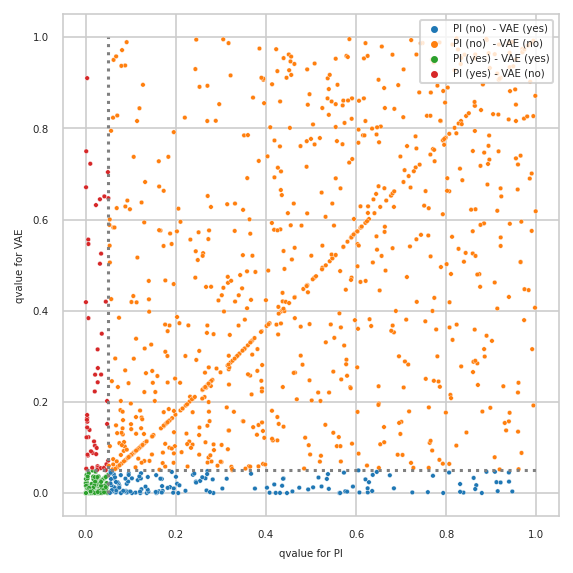

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


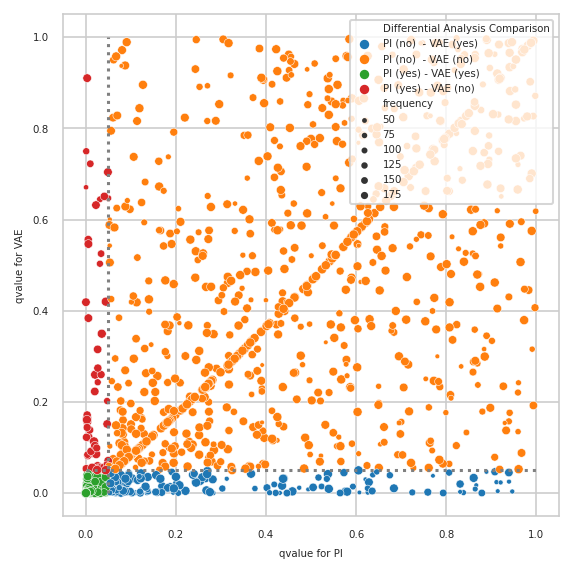

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out